In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from firestudio.studios.gas_studio import GasStudio
from abg_python.galaxy.gal_utils import Galaxy
from abg_python.all_utils import filterDictionary
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
don't have phil's colormaps


In [3]:
import os
import matplotlib

In [7]:
disk_mask = np.ones(galaxy.sub_star_snap['Masses'].size)
xs,ys,zs = galaxy.sub_star_snap['Coordinates'].T

disk_mask = (np.abs(xs) < 20) & (np.abs(ys) < 20) & (np.abs(zs) < 20)

In [4]:
matplotlib.rcParams['figure.dpi'] = 150

In [6]:
galaxy.extractMainHalo()

Using the saved sub-snapshots
Successfully loaded a pre-extracted subsnap
Reorienting...
Done.
extract_halo_inner(m12i_res7100_md at 600,){'orient_stars': True} 16.21 s elapsed
Snapshot memory free


(14.389217379832706,
 True,
 2.588189693003323,
 -2.7838931872964907,
 35229529293674.87,
 44642473906878.87,
 268.00569800569804,
 2.877843475966541)

In [5]:
snapdir = "/Users/agurvich/research/snaps/m12i_res7100/output/"
snapnum = 600 
galaxy = Galaxy(
    'm12i_res7100',
    '/projects/b1026/agurvich/snaps/metal_diffusion/m12i_res7100/output',
    600,
    datadir='/projects/b1026/agurvich/data/metal_diffusion')

Couldn't find a metadata file... for
 Metadata object at /projects/b1026/agurvich/data/metal_diffusion/m12i_res7100/metadata/meta_Galaxy_600.hdf5


13167524.132324219


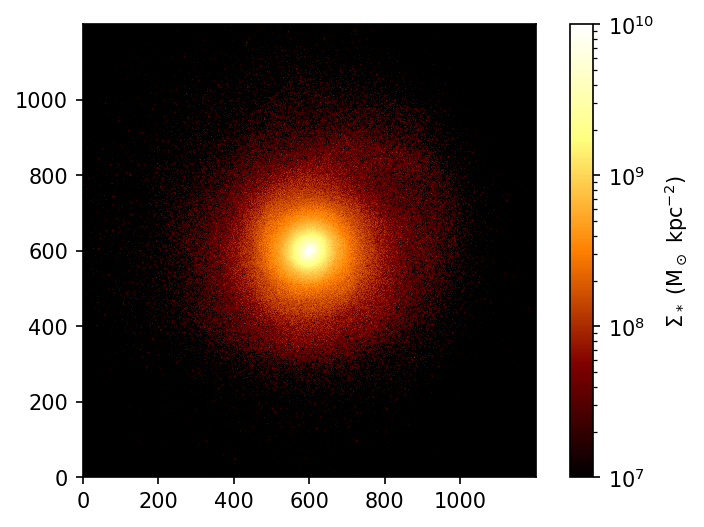

In [40]:
from matplotlib.colors import LogNorm
h_m,xedges,yedges = np.histogram2d(
    xs[disk_mask],
    ys[disk_mask],
    bins=1200,
    weights=galaxy.sub_star_snap['Masses'][disk_mask]*1e10)
print(h_m.max())

Acell = np.diff(xedges)[0]*np.diff(yedges)[0]
plt.imshow(h_m.T/Acell+1e-12,norm=LogNorm(vmin=1e7,vmax=1e10),origin='lower',cmap='afmhot')
plt.gca().set_aspect(1)
plt.colorbar(label='$\Sigma_*$ (M$_\odot$ kpc$^{-2}$)')

In [26]:
studio_datadir = os.path.join(os.path.dirname(galaxy.datadir),'firestudio')
print(studio_datadir)
my_gasStudio = GasStudio(
    studio_datadir,
    galaxy.snapnum,
    galaxy.datadir_name,
    gas_snapdict=galaxy.sub_snap,
    star_snapdict=galaxy.sub_star_snap,
    use_colorbar=True,
    cbar_logspace=True,
    cbar_label='$\Sigma_*$ (M$_\odot$ kpc$^{-2}$)'
    )

/projects/b1026/agurvich/data/metal_diffusion/firestudio
setting use_colorbar to user value of: True
setting cbar_logspace to user value of: True
setting cbar_label to user value of: $\Sigma_*$ (M$_\odot$ kpc$^{-2}$)
setting snapnum to user value of: 600
setting sim_name to user value of: m12i_res7100
setting frame_half_width to default value of: 15
setting frame_half_thickness to default value of: 15
setting frame_center to default value of: [0. 0. 0.]
setting theta to default value of: 0
setting phi to default value of: 0
setting psi to default value of: 0
setting aspect_ratio to default value of: 1
setting pixels to default value of: 1200
setting figure_label to default value of: 
setting scale_bar to default value of: True
setting scale_line_length to default value of: 5
setting noaxis to default value of: True
setting savefig to default value of: None
setting fontsize to default value of: 12
setting snapdir to default value of: None


cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'AgeGyr'){'snapdict_name': 'star'} success!
min_Masses =  7
max_Masses =  10
Image range (Masses):  5.201289 10.045331
Image range (8bit):  0.0 255.0


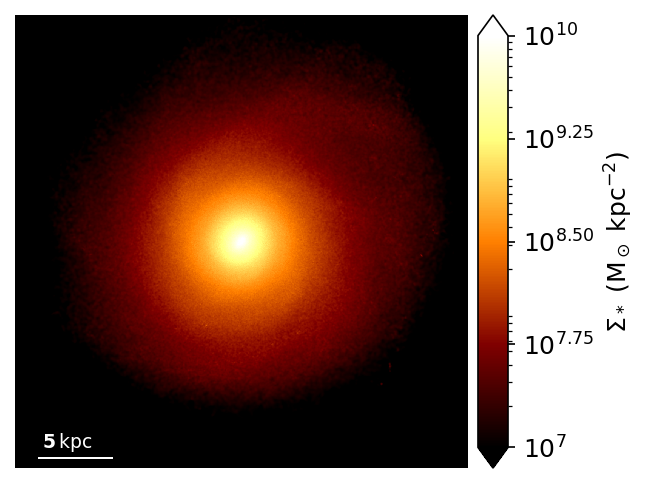

In [34]:
ax,pixels = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='AgeGyr',
    min_weight=7,
    max_weight=10,
    snapdict_name='star',
    weight_adjustment_function = lambda x: np.log10(x/my_gasStudio.Acell)+10,
    cmap='afmhot')

In [41]:
galaxy.sub_star_snap.keys()

dict_keys(['fnames', 'BoxSize', 'CompactLevel', 'Compactify_Version', 'Flag_Cooling', 'Flag_DoublePrecision', 'Flag_Feedback', 'Flag_IC_Info', 'Flag_Metals', 'Flag_Sfr', 'Flag_StellarAge', 'HubbleParam', 'MassTable', 'NumFilesPerSnapshot', 'NumPart_ThisFile', 'NumPart_Total', 'NumPart_Total_HighWord', 'Omega0', 'OmegaLambda', 'ReadMe', 'Redshift', 'Time', 'ScaleFactor', 'TimeGyr', 'cosmological', 'orient_stars', 'rect_buffer', 'scale_radius', 'scom', 'vscom', 'star_ltot', 'star_lz', 'Coordinates', 'Masses', 'Metallicity', 'ParticleChildIDsNumber', 'ParticleIDGenerationNumber', 'ParticleIDs', 'Potential', 'StellarFormationTime', 'Velocities', 'AgeGyr', 'thetay', 'thetaz', 'overwritten'])

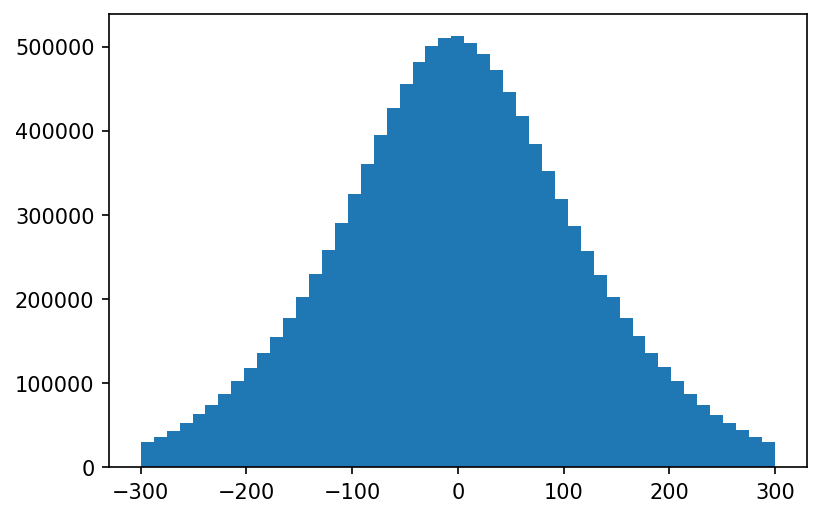

In [44]:
rhats = galaxy.sub_star_snap['Coordinates']/np.linalg.norm(galaxy.sub_star_snap['Coordinates'],axis=1)[:,None]
vrs = np.sum(rhats*galaxy.sub_star_snap['Velocities'],axis=1)
plt.hist(vrs[disk_mask],bins=np.linspace(-300,300,50))
print()

In [45]:
my_gasStudio.print_ImageParams()

use_colorbar = True
cbar_label = $\Sigma_*$ (M$_\odot$ kpc$^{-2}$)
cbar_logspace = True
frame_half_width = 15
frame_half_thickness = 15
frame_center = [0. 0. 0.]
theta = 0
phi = 0
psi = 0
aspect_ratio = 1
pixels = 1200
figure_label = 
scale_bar = True
noaxis = True
savefig = None
fontsize = 12
snapdir = None
snapnum = 600


cache star_faceon inner_weight_along_los(GasStudio instance, None, 'Masses', array([ -19.2325179 ,   64.12197809,   43.89104069, ...,  -47.79117626,
         56.39525693, -110.78473018]), 'vr'){'snapdict_name': 'star'} success!
min_vr =  -50
max_vr =  50
Image range (vr):  -52.001793 55.227016
Image range (8bit):  0.0 255.0


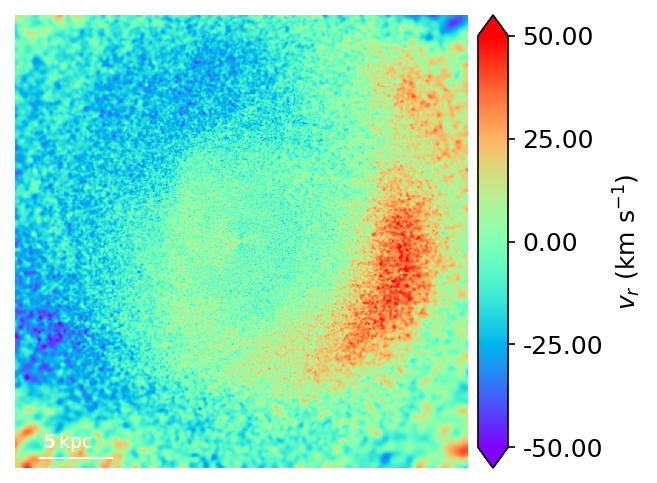

In [55]:
my_gasStudio.set_ImageParams(
    this_setup_id='star_faceon')

ax,pixels = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='vr',
    quantities=vrs,
    min_quantity=-50,
    max_quantity=50,
    snapdict_name='star',
#    quantity_adjustment_function = lambda x: np.log10(x/my_gasStudio.Acell)+10,
    cmap='rainbow')

In [60]:
my_gasStudio.set_ImageParams(
    this_setup_id='star_edgeon')

my_gasStudio.star_snapdict['Coordinates'] = my_gasStudio.rotateEuler(
    90,0,0,my_gasStudio.star_snapdict['Coordinates'])

my_gasStudio.star_snapdict['Velocities'] = my_gasStudio.rotateEuler(
    90,0,0,my_gasStudio.star_snapdict['Velocities'])

setting cbar_label to user value of: $v_z$ (km s$^{-1}$)
cache star_edgeon inner_weight_along_los(GasStudio instance, None, 'Masses', array([ 144.50682 , -172.55959 ,  151.60541 , ...,   12.010683,
         78.81998 ,  -76.06151 ], dtype=float32), 'vz'){'snapdict_name': 'star'} success!
min_vz =  -200
max_vz =  200
Image range (vz):  -187.461 206.28659
Image range (8bit):  7.9936132 255.0


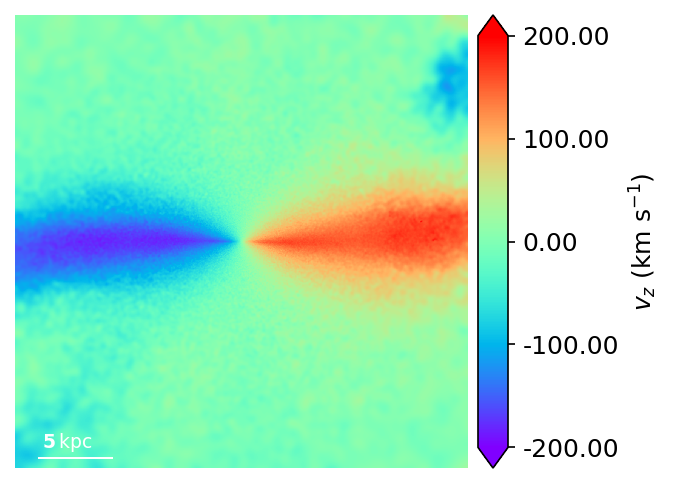

In [65]:
my_gasStudio.set_ImageParams(
    this_setup_id='star_edgeon',
    cbar_label='$v_z$ (km s$^{-1}$)')

ax,pixels = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='vz',
    quantities=my_gasStudio.star_snapdict['Velocities'][:,-1],
    min_quantity=-200,
    max_quantity=200,
    snapdict_name='star',
#    quantity_adjustment_function = lambda x: np.log10(x/my_gasStudio.Acell)+10,
    cmap='rainbow')